In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_curve
import itertools
import yaml
import os
import numpy as np
from statistics import mean

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y plotea la matriz de confusión.
    La normalización se puede aplicar configurando `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

In [3]:
path = 'Mode_train-Model_random_forest-TrainWindow_48-TrainPeriod_1-TradingStrategy_macd_strategy-PeriodsForwardTarget_2-SL_15-TP_45-UseDaysInClosePos_False'
orders = pd.read_csv(os.path.join('./backbone/data/experiments', path, 'orders.csv'))
wallet = pd.read_csv(os.path.join('./backbone/data/experiments', path, 'wallet.csv'))
true_values = pd.read_csv(os.path.join('./backbone/data/experiments', path, 'truevals.csv'))
predictions = pd.read_csv(os.path.join('./backbone/data/experiments', path, 'preds.csv'))

In [4]:
orders

,id,ticker,type,open_date,close_date,open_price,close_price,profit,stop_loss,take_profit,units,profit_in_pips,comment
0,fcd539dd-0d89-11ef-9db7-89ad4012615a,USDJPY,buy,2024-01-15 15:00:00,2024-01-16 10:00:00,145.78300,146.43500,4.56400,145.63300,146.23300,7,0.65200,closed for take profit
1,fd9a6b7d-0d89-11ef-9c36-89ad4012615a,USDCAD,buy,2024-01-15 17:00:00,2024-01-16 09:00:00,1.34357,1.34815,3.05486,1.34207,1.34807,667,0.00458,closed for take profit
2,051ac622-0d8a-11ef-8283-89ad4012615a,USDCAD,buy,2024-01-16 11:00:00,2024-01-16 14:00:00,1.34967,1.34754,-1.52721,1.34817,1.35417,717,-0.00213,closed for stop loss
3,05fd01ce-0d8a-11ef-a539-89ad4012615a,USDCHF,buy,2024-01-16 13:00:00,2024-01-17 15:00:00,0.86017,0.86619,4.31634,0.85867,0.86467,717,0.00602,closed for take profit
4,07b972d0-0d8a-11ef-b511-89ad4012615a,USDJPY,buy,2024-01-16 17:00:00,2024-01-16 19:00:00,146.70500,147.24900,3.80800,146.55500,147.15500,7,0.54400,closed for take profit
5,7fca416b-0d8a-11ef-b48a-89ad4012615a,AUDUSD,sell,2024-02-01 15:00:00,2024-02-01 17:00:00,0.65191,0.65440,-1.89489,0.65341,0.64741,761,-0.00249,closed for stop loss
6,8ee8908c-0d8a-11ef-aebb-89ad4012615a,AUDUSD,buy,2024-02-05 15:00:00,2024-02-05 17:00:00,0.64880,0.64722,-1.18342,0.64730,0.65330,749,-0.00158,closed for stop loss
7,b0549ba9-0d8a-11ef-bf8b-89ad4012615a,USDJPY,buy,2024-02-08 18:00:00,2024-02-13 15:00:00,149.24600,150.43500,8.32300,149.09600,149.69600,7,1.18900,closed for take profit
8,ef7d1dc3-0d8a-11ef-b789-89ad4012615a,USDJPY,buy,2024-02-20 10:00:00,2024-02-20 12:00:00,150.31700,150.13900,-1.42400,150.16700,150.76700,8,-0.17800,closed for stop loss
9,2988d2d4-0d8b-11ef-a67a-89ad4012615a,USDJPY,sell,2024-02-29 02:00:00,2024-02-29 04:00:00,150.56400,149.78200,6.25600,150.71400,150.11400,8,0.78200,closed for take profit


In [5]:
orders[orders['profit']<0].agg({'profit':['median', 'std']})

,profit
median,-1.527210
std,0.416593


In [6]:
orders[orders['profit']>0].agg({'profit':['median', 'std']})

,profit
median,4.31634
std,1.82874


In [7]:
orders.comment.value_counts()

comment
closed for take profit    7
closed for stop loss      7
Name: count, dtype: int64

In [8]:
orders[(orders['comment']=='closed for indicator signal') & (orders['profit']>0)].shape

(0, 13)

In [9]:
with open('configs/project_config.yml', 'r') as archivo:
    config = yaml.safe_load(archivo)

tickers = config["tickers"] 
tickers

predictions = predictions.sort_values(by='fecha')
true_values = true_values.sort_values(by='fecha')


# renombro las columnas
column_names = {}
for column in predictions.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_proba'

predictions = predictions.rename(columns=column_names)

column_names = {}
for column in true_values.columns:
    if column != 'fecha':
        column_names[column] = f'{column}_true'

true_values = true_values.rename(columns=column_names)
performance = pd.concat(
    [
        predictions,
        true_values
    ], axis=1, join="inner"
)

auc_list = []
for ticker in tickers:
    y_true = performance[performance[f'{ticker}_true'].notna()][f'{ticker}_true']
    y_pred = performance[performance[f'{ticker}_proba'].notna()][f'{ticker}_proba']
    
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    
    auc_list.append(auc_score)
    print(f'{ticker}: {auc_score}')

print(mean(auc_list))

EURUSD: 0.5149827680029022
GBPUSD: 0.5391444567245847
USDJPY: 0.5303975917438117
USDCAD: 0.5015210436234101
AUDUSD: 0.5039598556744793
USDCHF: 0.5498516869472382
0.5233095671194044


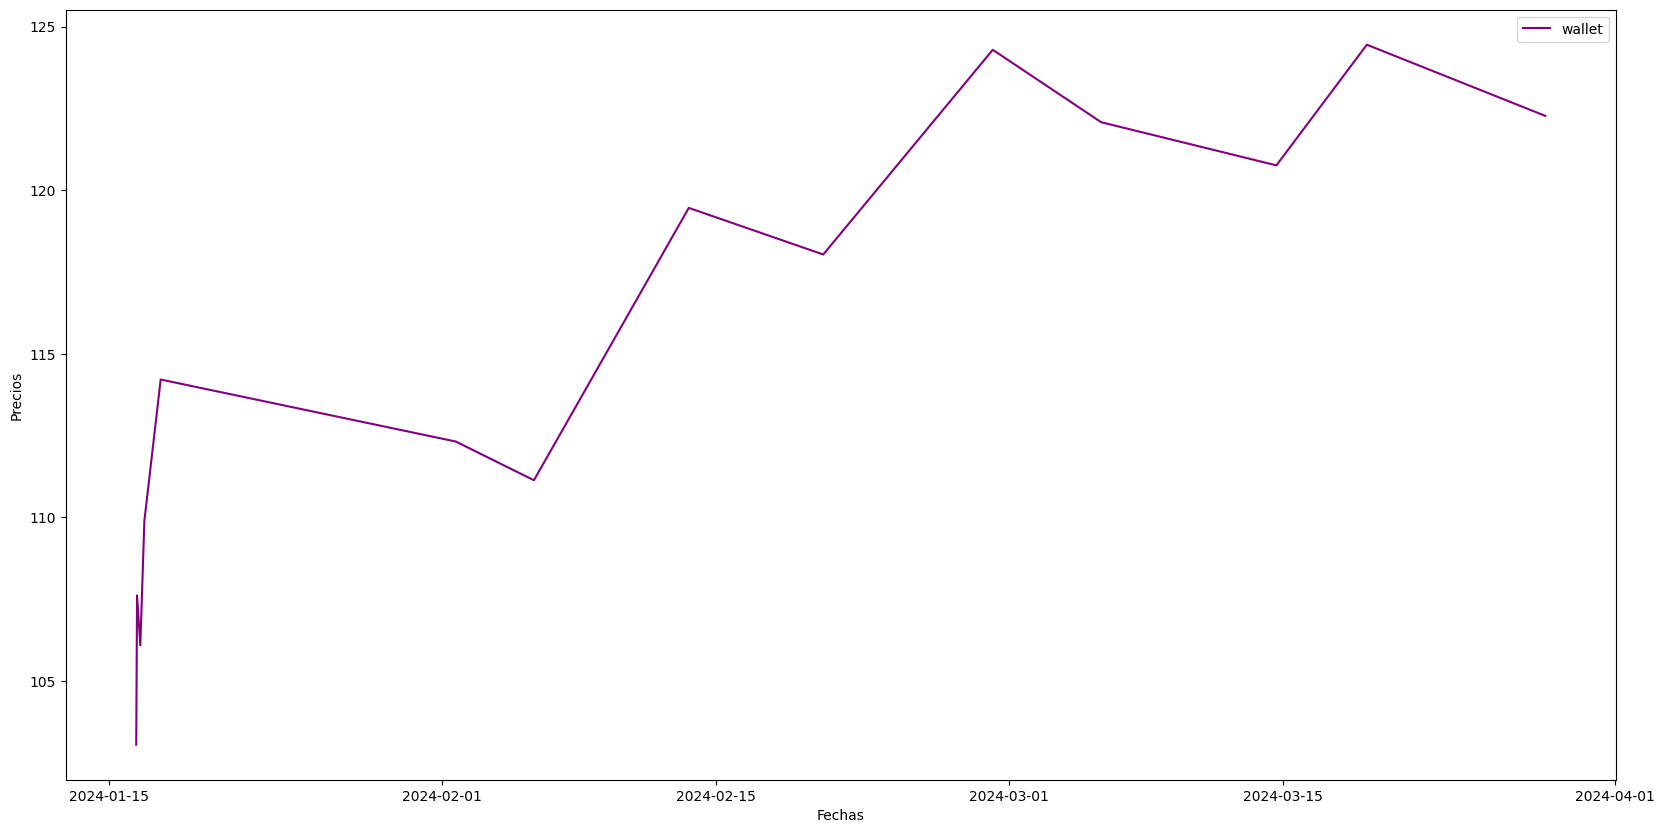

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Grafico de velas

In [11]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=prices['Date'],
#                 open=prices['Open'],
#                 high=prices['High'],
#                 low=prices['Low'],
#                 close=prices['Close'])])

# fig.update_layout(
#     title=f"{config['ticker']}",
#     yaxis_title=f"{config['ticker']} Stock"
# )

# fig.show()

# Estrategia

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['fecha'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

x_wallet = pd.to_datetime(wallet['date'])
y_wallet = wallet['wallet']  # Datos para la línea

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

ax.plot(x_wallet, y_wallet, label='wallet', color='purple')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


NameError: name 'prices' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x_prices = pd.to_datetime(prices['Date'])
y_prices = prices['Close']  # Datos para la línea

x_buy = pd.to_datetime(buys['date'])
y_buy = buys['buy']  # Datos para el scatter plot

x_sell = pd.to_datetime(sells['date'])
y_sell = sells['sell']  # Datos para el scatter plot

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='market', color='black')

# Agregar el scatter plot
ax.scatter(x_buy, y_buy, label='compras', color='cyan', marker='>')

ax.scatter(x_sell, y_sell, label='Ventas', color='red', marker='o')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

print('Area bajo la curva: ', auc(wallet.index, wallet['wallet']))

# Datos de ejemplo
x_prices = pd.to_datetime(wallet['date'])
y_prices = wallet['wallet']  # Datos para la línea


# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(20, 10))

# Agregar la línea
ax.plot(x_prices, y_prices, label='Wallet', color='blue')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('Fechas')
ax.set_ylabel('Precios')
ax.legend()

# Mostrar el gráfico
plt.show()


# Modelo

In [ ]:
predictions.sort_values(by='fecha')

In [ ]:
true_values.sort_values(by='fecha')

In [ ]:
accuracy_score(predictions[predictions['YPF'].notna()].YPF, true_values[true_values['YPF'].notna()].YPF)

In [ ]:
threshold_down = 0.5
threshold_up = 0.5

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
threshold_down = 0.1
threshold_up = 0.9

df_predictions = performance[(performance['y_pred']<threshold_down) | (performance['y_pred']>threshold_up)].copy()
df_predictions['y_pred'] = np.where(df_predictions['y_pred']<threshold_down, 0, df_predictions['y_pred'])
df_predictions['y_pred'] = np.where(df_predictions['y_pred']>threshold_up, 1, df_predictions['y_pred'])

print(accuracy_score(df_predictions.y_true, df_predictions.y_pred))
plot_confusion_matrix(df_predictions.y_true, df_predictions.y_pred, classes=[0,1], cmap=plt.cm.Reds)

In [ ]:
plt.hist(performance.y_pred, color='lightgreen', ec='black', bins=50)
plt.show()

In [ ]:
buys = buys.rename(columns={''})

In [ ]:
operations = pd.concat([buys[buys['YPF'].notna()], sells[sells['YPF'].notna()]], axis=1, join="inner")[['fecha','YPF']]
operations

In [ ]:
operations['positive'] = np.where(operations['buy']>operations['sell'], 0, 1)
operations['Profit'] = operations['sell'] - operations['buy'] 
operations['positive'].value_counts()